## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [120]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [147]:
# your code here
#model1 = nn.Sequential(OrderedDict([
#    ('hidden', nn.
#]))

model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 2)),
    ('output', nn.Linear(2, 1))
]))

model2 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2, 5)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(5, 3)),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(3, 1)),
    ('relu3', nn.ReLU())
]))

model3 = nn.Sequential(OrderedDict([
('fc1', nn.Linear(2, 4)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(4, 8)),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(8, 1)),
    ('sigmoid', nn.Sigmoid())
]))

# the database contains 0 and 1 because we must add two bits
# 3 layers: the input and output layers and one hidden layer
# the activation function is the sigmoid function
# the loss function is 

# for MODEL 1:
# input layer has 2 neurons, hidden layer has 2 neurons and output layer has 1 neuron

# for MODEL 2:
# input layer has 2 neurons, hidden layer has 4 neurons and output layer has 1 neuron

# for MODEL 3:
# input layer has 2 neurons, hidden layer has 8 neurons and output layer has 1 neuron

In [148]:
print(model1)
print(model2)
print(model3)

Sequential(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
  (relu3): ReLU()
)
Sequential(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=4, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [149]:
# your code here
#data_in = torch.tensor( ...
#contains all the possible combinations of bits(0, 1)
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [150]:
# your code here
# data_target = torch.tensor( ...
# contains all the possible results of adding 2 bits
data_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

print(data_target)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [151]:
# your code here
# criterion = 
# optimizer = 

criterion = nn.BCEWithLogitsLoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1) # calculates gradients with learning rate 0.1
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1)

In [ ]:
# your code here
# Train the model

# train the model 1 for 1000 epochs
num_epochs = 1000

print('MODEL 1')
for epoch in range(num_epochs):
    # Forward pass
    output = model1(data_in)
    
    # Calculate the loss
    loss = criterion(output, data_target)
    
    # Backward pass and optimization
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        
# train the model 2 for 1000 epochs

print('MODEL 2')
for epoch in range(num_epochs):
    # Forward pass
    output = model2(data_in)
    
    # Calculate the loss
    loss = criterion(output, data_target)
    
    # Backward pass and optimization
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        
        
# train the model 3 for 1000 epochs

print('MODEL 3')
for epoch in range(num_epochs):
    # Forward pass
    output = model3(data_in)
    
    # Calculate the loss
    loss = criterion(output, data_target)
    
    # Backward pass and optimization
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Model 1's predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.]])


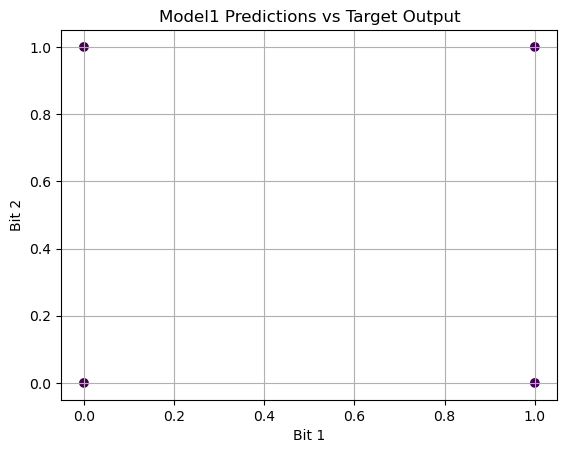

Model 2's predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.]])


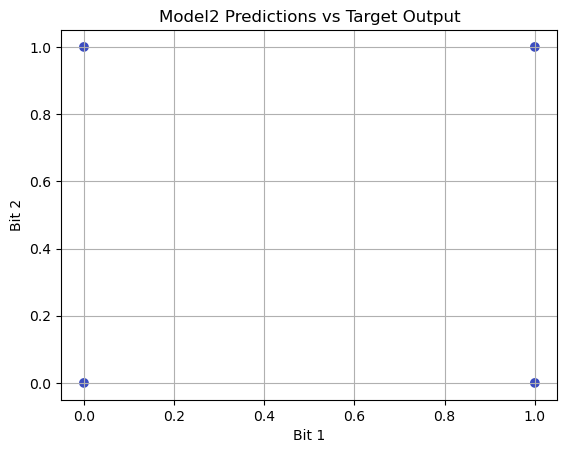

Model 3's predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.]])


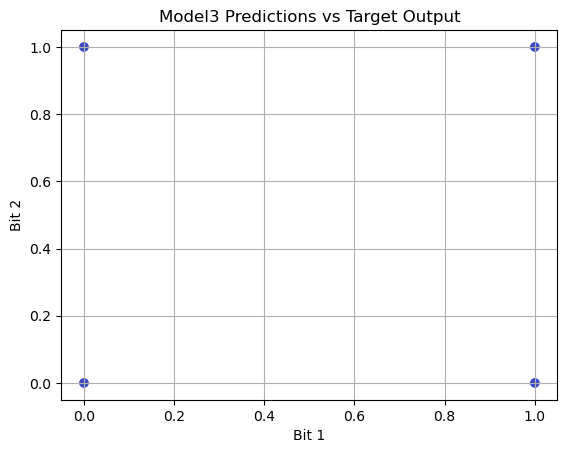

In [146]:
# your code here
# visualize the results


import matplotlib.pyplot as plt

# for MODEL 1:

output = model1(data_in)

# Convert the output probabilities to binary predictions
predictions = (output >= 0.5).float()

# Print the model's predictions
print("Model 1's predictions:")
print(predictions)

# Visualize the model's predictions against the target output
fig, ax = plt.subplots()

ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0])
ax.set(xlabel='Bit 1', ylabel='Bit 2', title='Model1 Predictions vs Target Output')
ax.grid()

plt.show()

# for MODEL 2:

output = model2(data_in)

# Convert the output probabilities to binary predictions
predictions = (output >= 0.5).float()

# Print the model's predictions
print("Model 2's predictions:")
print(predictions)

# Visualize the model's predictions against the target output
fig, ax = plt.subplots()

ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap='coolwarm')
ax.set(xlabel='Bit 1', ylabel='Bit 2', title='Model2 Predictions vs Target Output')
ax.grid()

plt.show()

# for MODEL 3:

output = model3(data_in)

# Convert the output probabilities to binary predictions
predictions = (output >= 0.5).float()

# Print the model's predictions
print("Model 3's predictions:")
print(predictions)

# Visualize the model's predictions against the target output
fig, ax = plt.subplots()

ax.scatter(data_in[:, 0], data_in[:, 1], c=predictions[:, 0], cmap='coolwarm')
ax.set(xlabel='Bit 1', ylabel='Bit 2', title='Model3 Predictions vs Target Output')
ax.grid()

plt.show()

In [138]:
# your code here
# print model weights

accuracies = []
models = [model1, model2, model3]
for model in models:
    model.eval()
    with torch.no_grad():
        outputs = model(data_in)
        predicted = (outputs >= 0.5).float()
        accuracy = (predicted == data_target).float().mean()
        accuracies.append(accuracy)

    print("Accuracy: {:.2f}%".format(accuracy.item() * 100))
    
# Select the best-performing model
best_model = models[accuracies.index(max(accuracies))]

print('Model ' + str(accuracies.index(max(accuracies)) + 1) + ' is the best!')


Accuracy: 50.00%
Accuracy: 50.00%
Accuracy: 50.00%
Model 1 is the best!
